# Diversity in Tech Companies
***Gender and Cultural Diversity breakdown of key technology companies***

<b>About Dataset</b>

This dataset provides a comprehensive breakdown of employee demographics, focusing on cultural and gender diversity, in key technology companies from the years 2014 to 2018. It includes the percentage of female and male employees, as well as the percentage of employees from different ethnic backgrounds, including White, Asian, Latino, Black, and others. The dataset aims to shed light on the diversity landscape within these tech giants, offering valuable insights for diversity and inclusion initiatives in the tech industry.

Source: https://www.kaggle.com/datasets/jainaru/diversity-in-tech-companies/data

In [22]:
# Import required libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import decorator
import numpy as np

%matplotlib inline


In [23]:
# Get path to the file location
dir_path = os.path.realpath(os.getcwd())
print('dir_path:',dir_path)
file_loc = dir_path + '\\datasets\\Diversity in Tech Companies\\Diversity in Tech Companies.csv'

# Create DataFrame and read file
df = pd.DataFrame()
df = pd.read_csv(file_loc)


dir_path: C:\Users\leoha\Downloads\IBM Business Intelligence (BI) Analyst Specialization\Social Network Data Analysis


In [24]:
# Check dataframe print top 5 lines
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


In [25]:
df. describe()

,Year,Female %,Male %,% White
count,94.000000,94.000000,94.000000,94.000000
mean,2016.106383,35.234043,64.744681,59.393617
std,1.432856,9.446426,9.464065,9.897559
min,2014.000000,16.000000,46.000000,37.000000
25%,2015.000000,29.000000,57.250000,53.000000
50%,2016.000000,33.000000,67.000000,60.000000
75%,2017.000000,42.750000,71.000000,66.500000
max,2018.000000,54.000000,84.000000,79.000000


In [26]:
# Since there is missing columns info in describe, that means that not values are numeric
# Check Dataframe types
print(df.info())

print(type(df.info()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          94 non-null     int64 
 1   Company       94 non-null     object
 2   Female %      94 non-null     int64 
 3   Male %        94 non-null     int64 
 4   % White       94 non-null     int64 
 5   % Asian       94 non-null     object
 6   % Latino      94 non-null     object
 7   % Black       94 non-null     object
 8   % Multi       94 non-null     object
 9   % Other       93 non-null     object
 10  % Undeclared  94 non-null     object
dtypes: int64(4), object(7)
memory usage: 8.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          94 non-null     int64 
 1   Company       94 non-null     object
 2   Female %      94 non

In [27]:
# Fill missing values for "% value"

# Select all the columns with % values
percent_col = df.columns
print (percent_col)

for col in percent_col:
    if col.find('%') == -1:
        percent_col = percent_col.drop(col)

print (percent_col)

# Check types and fill/convert missing or non-numeric values
for col in percent_col:
    if df.dtypes[col] == 'int64':
        continue
    else:
        df[col] = pd.to_numeric(df[col].replace('<','').replace('>','').replace('-','').replace('',0), errors='coerce').fillna(0).astype(int)

df.info()

df.describe()

Index(['Year', 'Company', 'Female %', 'Male %', '% White', '% Asian',
       '% Latino', '% Black', '% Multi', '% Other', '% Undeclared'],
      dtype='object')
Index(['Female %', 'Male %', '% White', '% Asian', '% Latino', '% Black',
       '% Multi', '% Other', '% Undeclared'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          94 non-null     int64 
 1   Company       94 non-null     object
 2   Female %      94 non-null     int64 
 3   Male %        94 non-null     int64 
 4   % White       94 non-null     int64 
 5   % Asian       94 non-null     int32 
 6   % Latino      94 non-null     int32 
 7   % Black       94 non-null     int32 
 8   % Multi       94 non-null     int32 
 9   % Other       94 non-null     int32 
 10  % Undeclared  94 non-null     int32 
dtypes: int32(6), int64(4), object(1)
memory usa

,Year,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,2016.106383,35.234043,64.744681,59.393617,22.989362,7.659574,5.500000,2.319149,1.255319,0.414894
std,1.432856,9.446426,9.464065,9.897559,12.607810,4.952578,4.277347,3.230276,1.335505,1.768357
min,2014.000000,16.000000,46.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,29.000000,57.250000,53.000000,13.000000,4.000000,2.250000,0.000000,0.000000,0.000000
50%,2016.000000,33.000000,67.000000,60.000000,22.000000,7.000000,4.000000,1.500000,1.000000,0.000000
75%,2017.000000,42.750000,71.000000,66.500000,31.000000,9.750000,8.000000,3.000000,2.000000,0.000000
max,2018.000000,54.000000,84.000000,79.000000,65.000000,35.000000,21.000000,14.000000,5.000000,13.000000


In [28]:
# Check for duplicates
df_duplicated = df[df.duplicated()]
df_duplicated.head()
desc = df_duplicated.describe()
desc.loc['count'].sum()
n_year = len(df["Year"].unique())
print(n_year)


5


In [29]:
# Save cleaned dataset
clean_file_loc = dir_path + '\\datasets\\Diversity in Tech Companies\\Diversity in Tech Companies_clean.csv'
df.to_csv(clean_file_loc)


<Axes: xlabel='Company'>

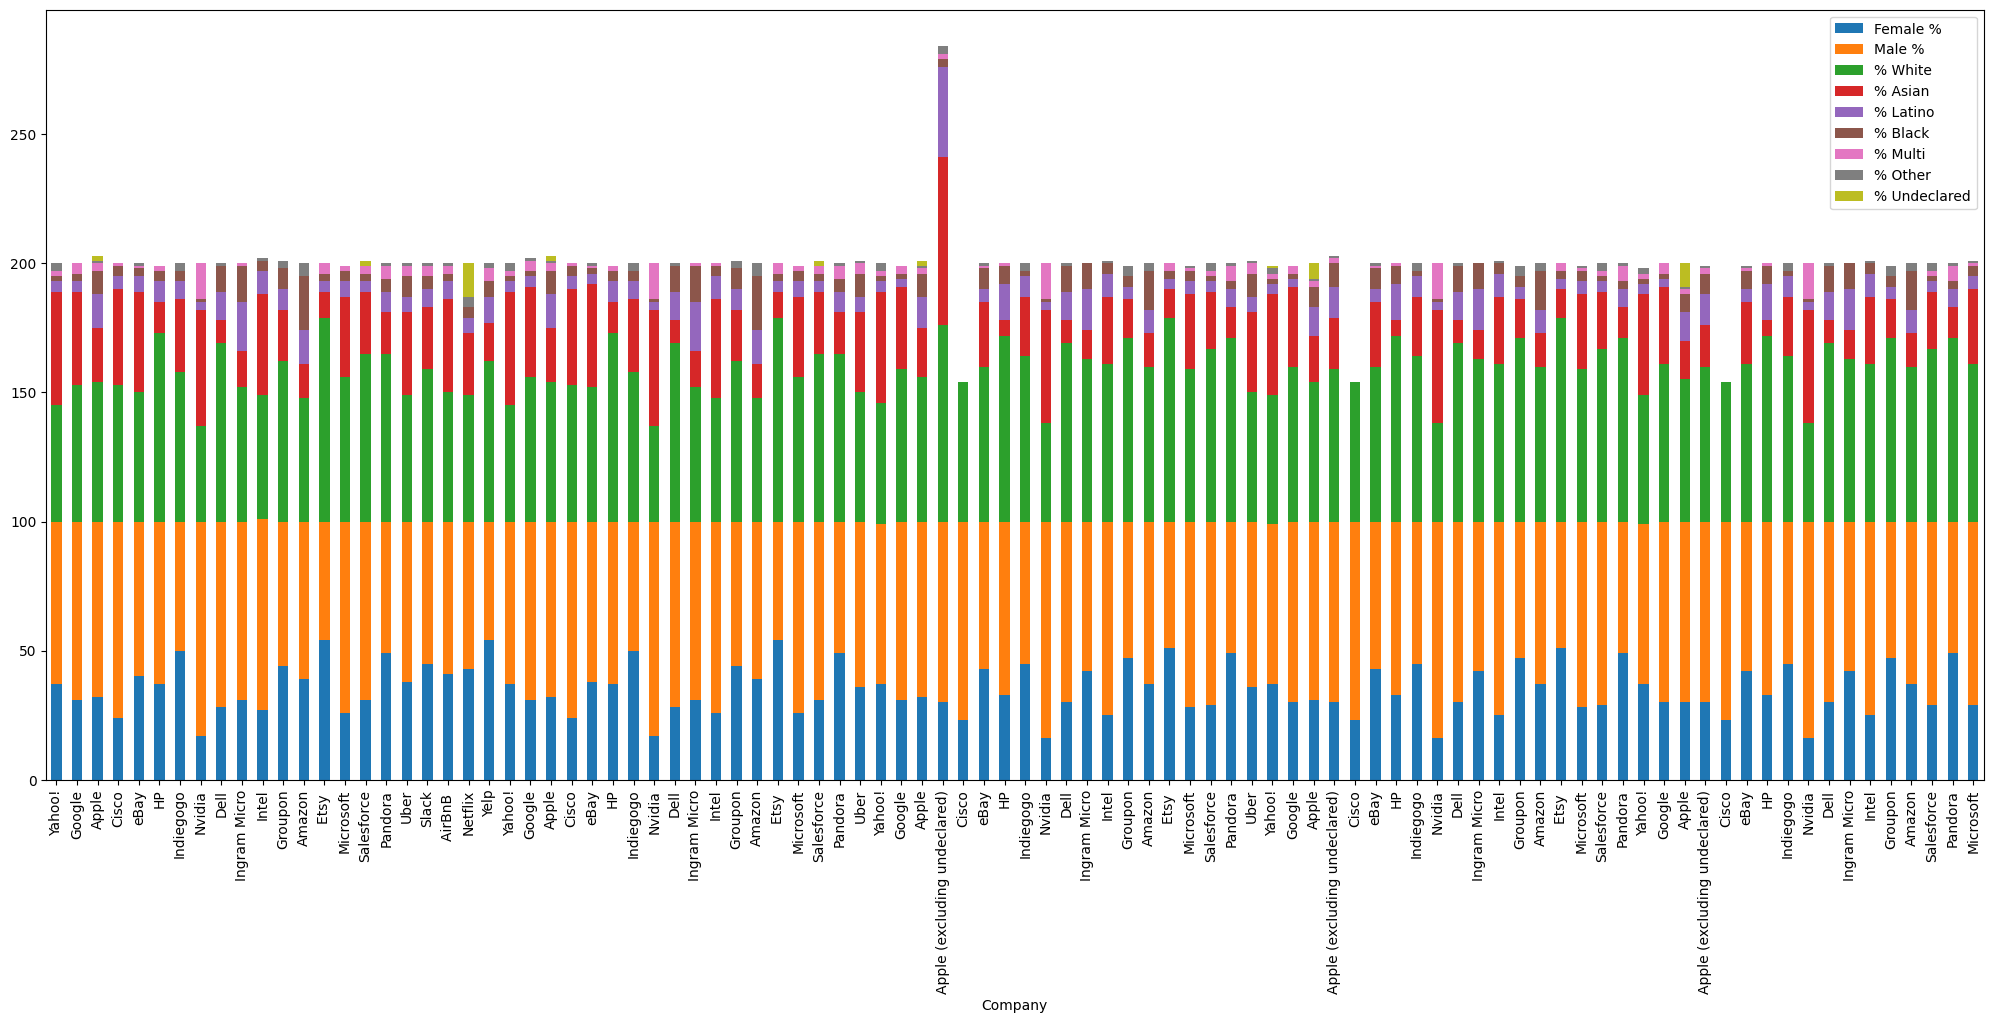

In [30]:
df.plot(kind='bar',x='Company', y = percent_col, stacked=True,figsize=(25,10))

<Axes: xlabel='Company'>

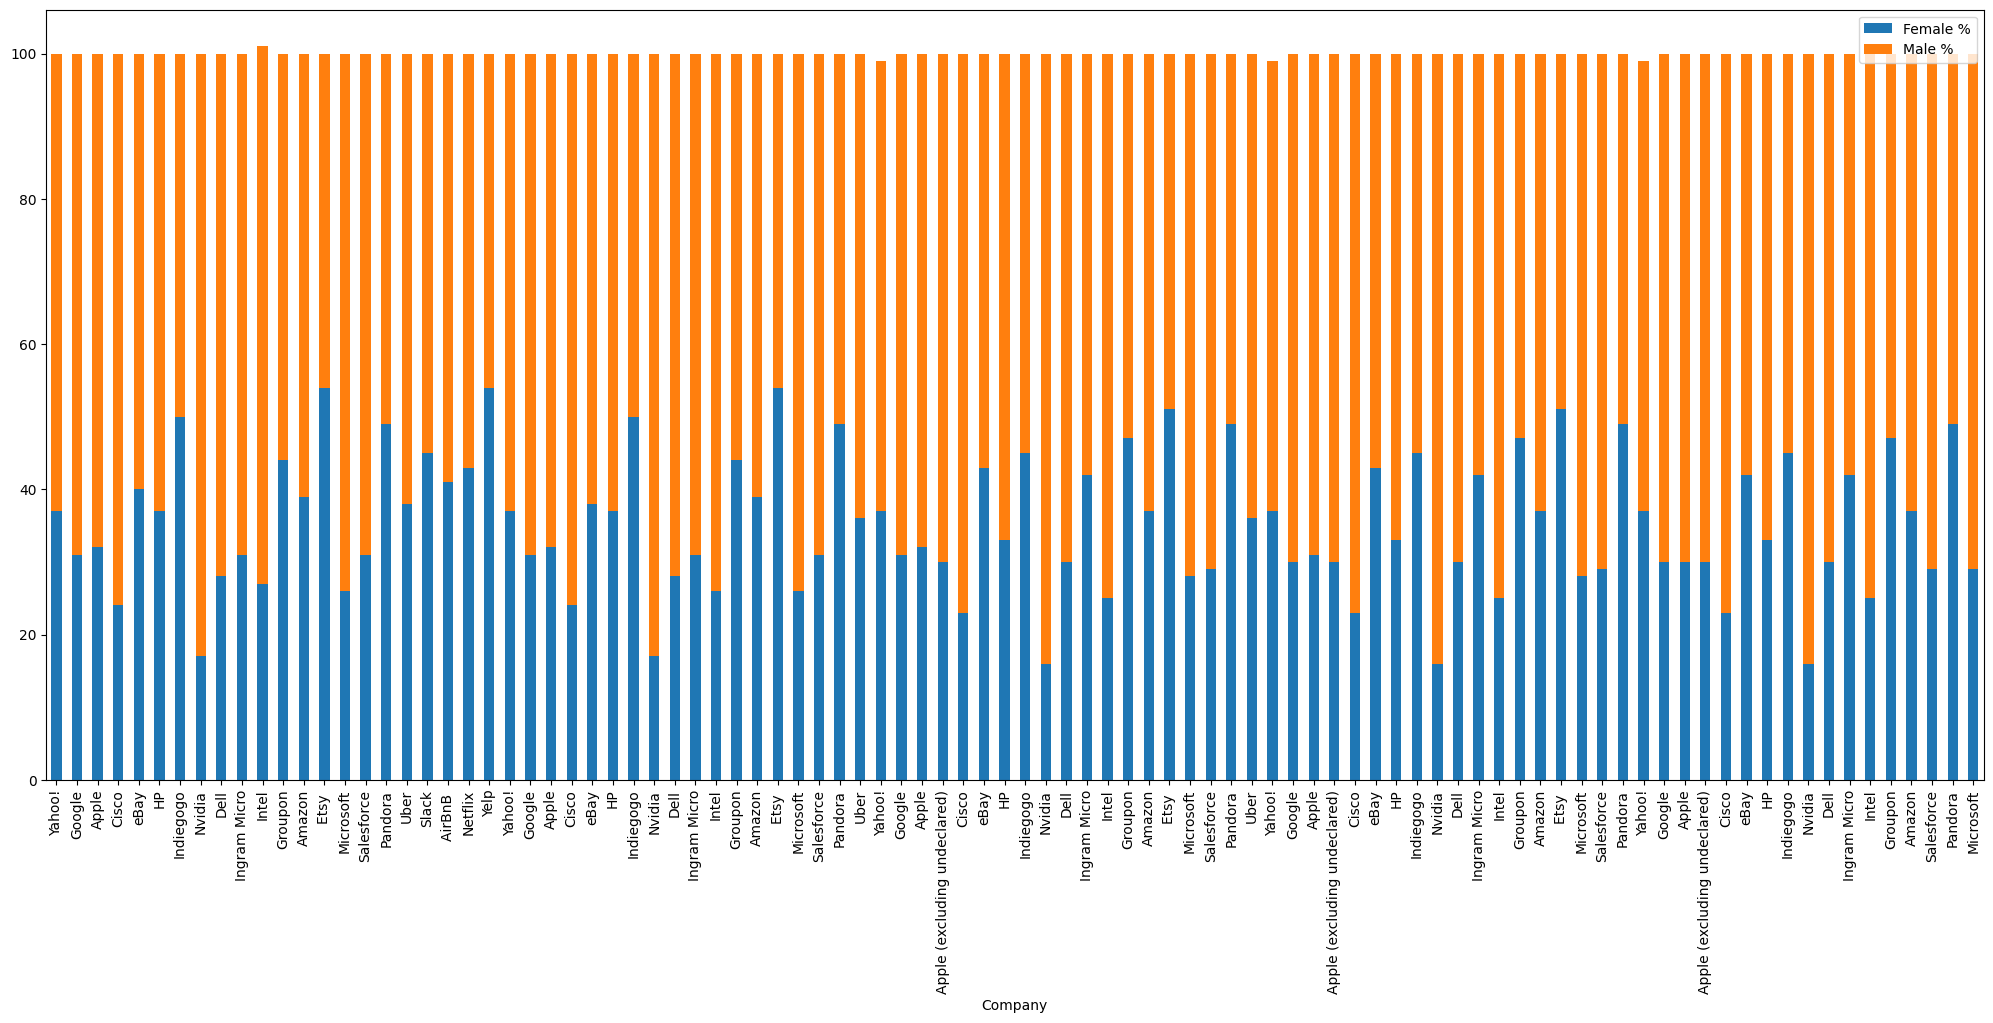

In [31]:
#n_year = df["Year"].unique()
#
#fig, ax = plt.subplots(figsize=(10,5), nrows=len(n_year),ncols=1, sharex=False, sharey=False)
#
#for i in range(0,len(n_year),1):
#    for col in percent_col:
#        ax[i].plot(df[[n_year[i]]], df[[col]])
#        ax[i].set_subtitle(col)
#        
#fig.plot()

df.plot(kind='bar',x='Company', y = ['Female %', 'Male %'], stacked=True,figsize=(25,10))


<Axes: xlabel='Company'>

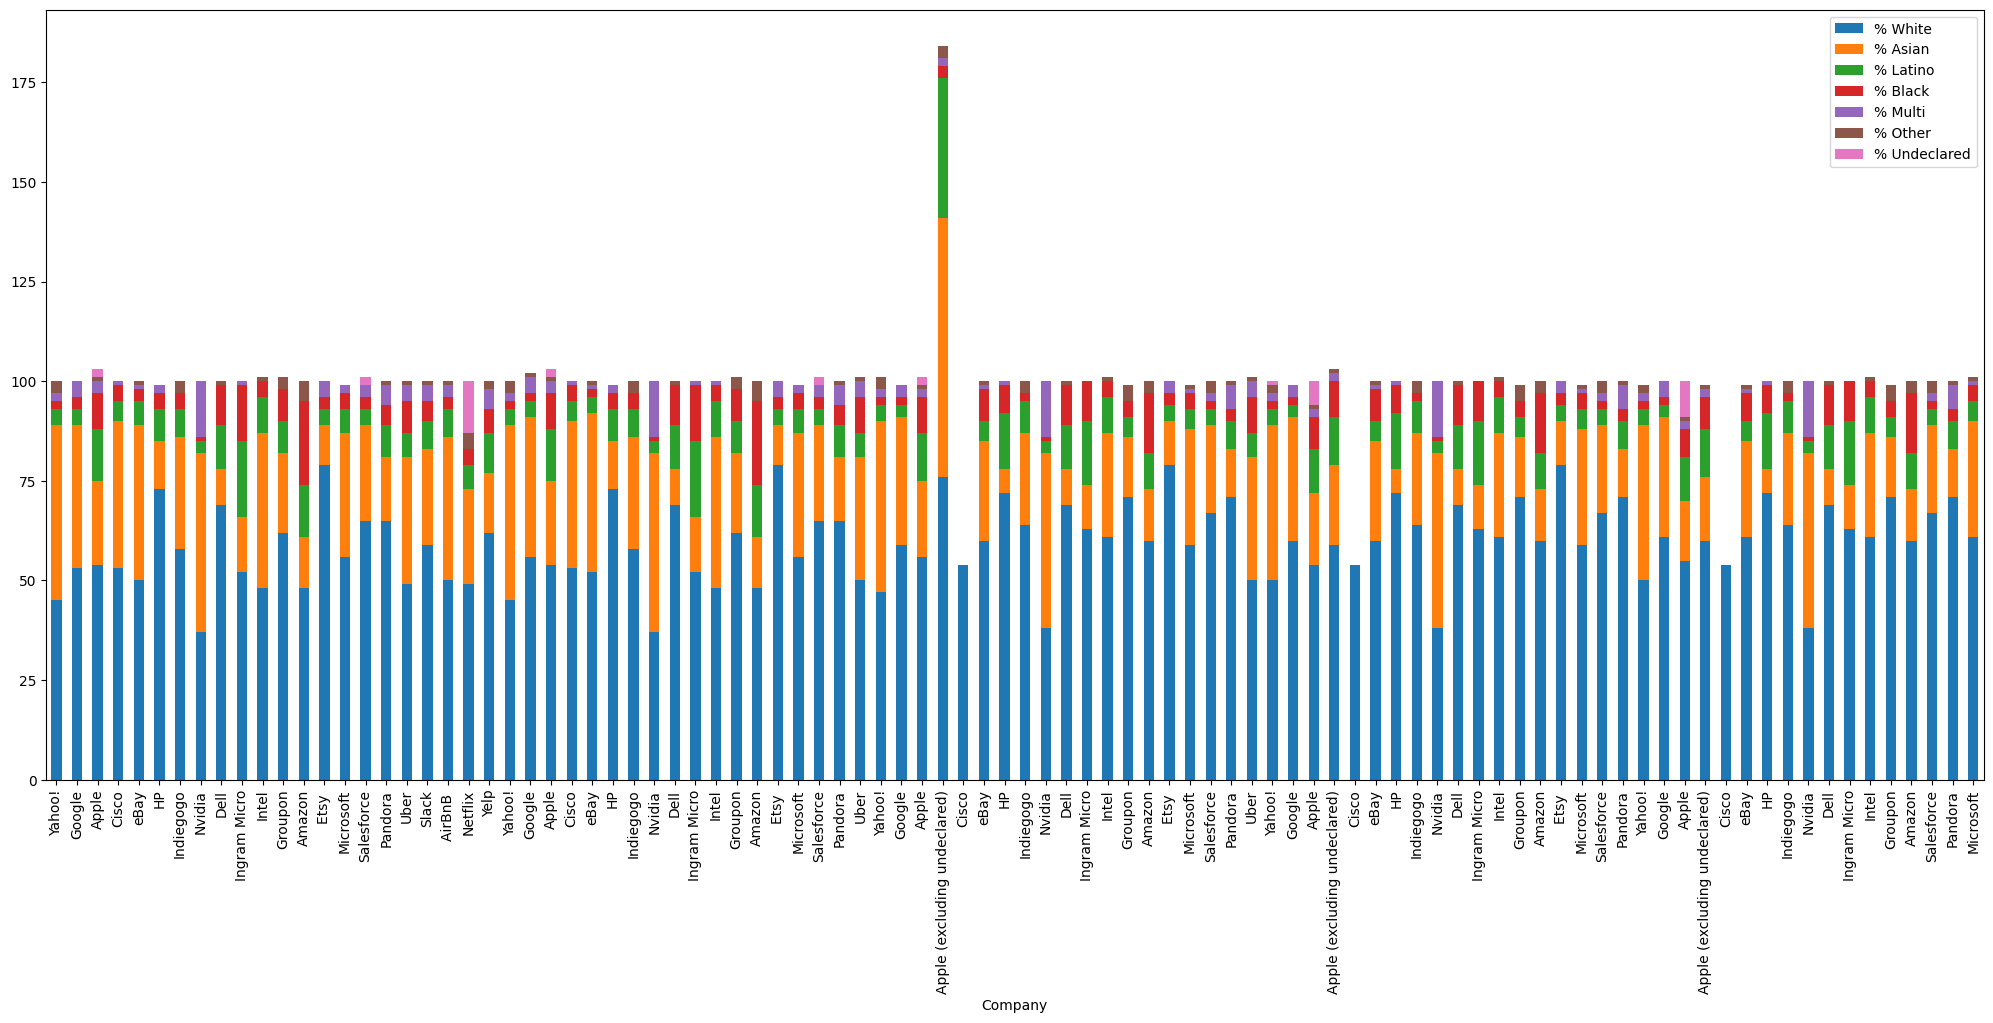

In [32]:
percent_col = percent_col.drop('Female %')
percent_col = percent_col.drop('Male %')
df.plot(kind='bar',x='Company', y = percent_col, stacked=True,figsize=(25,10))